### Probabilistic biostatistics sequential updating example
Code snippets to reproduce the sequential updating example in the paper and presentation

In [1]:
using CSV

In [2]:
# CAMS data for Treatment and Placebo
df1 = CSV.read("jcp1.csv")
df4 = CSV.read("jcp2.csv")
wk121 = df1.wk121;
wk124 = df4.wk124;

In [7]:
using Plots, Distributions, BayesTesting, LaTeXStrings

n    odds   prob<0     p-value
18   1.38   0.2337    0.4674
36   1.19   0.2893    0.5786
54   3.5   0.0622    0.1244
72   64.23   0.0025    0.0051
90   524.8   0.0003    0.0006
108   826.38   0.0002    0.0003
126   307.47   0.0005    0.001
144   672.61   0.0002    0.0004
162   60362.09   0.0    0.0
180   35578.84   0.0    0.0
198   5.0e6   0.0    0.0


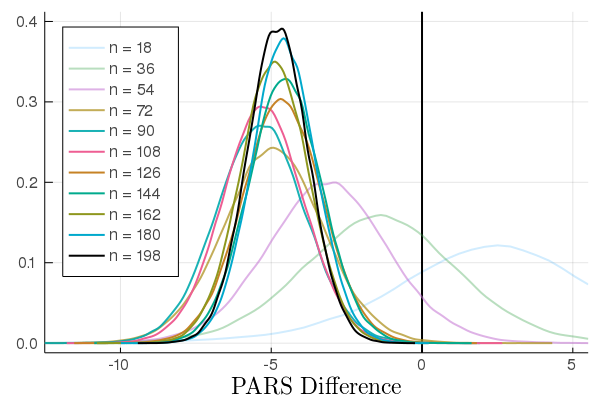

In [9]:
M = 100000
### Proceedings Figure 1 and Table 1:
plt1 = plot()
println("n    odds   prob<0     p-value")
xlabstr = latexstring("\\mathrm{PARS \\; Difference}")
for i = 6:6:66
    q = i*2      #### need 2:1 ratio of treated to PCBO
    m1 = mean(wk121[1:q]); sd1 = std(wk121[1:q])    # group 1 Treatment
    m4 = mean(wk124[1:i]); sd4 = std(wk124[1:i])    # group 4 Placebo
    # Distn. of means with draws from analytical posterior t-distributiion
    # Can use MCMC instead here from conditional posteriors,
    # equations (3) and (4).
    t1draw = m1 .+ (sd1/sqrt(q)).*rand(TDist(q-1),M)
    t4draw = m4 .+ (sd4/sqrt(i)).*rand(TDist(i-1),M)
    dift1t4 = t1draw - t4draw      # Treatment vs. Placebo
#    @show(round.(post_odds_pval(dift1t4),digits=4))
    # od, p_val, pval_2 = post_odds_pval(dift1t4)
    od = mcodds(dift1t4)
    p_val, pval_2 = bayespval(dift1t4)
    odds = round(od,digits=2)
    pval2 = round(pval_2,digits=4)
    pval = round(p_val,digits=4)
    println(3*i,"   ",odds,"   ",pval,"    ",pval2)

    if i == 6
        plt1 = plot(dift1t4, st=:density, alpha=(i*0.02*3/2),linewidth=2, xlims=[-12.0,5.0],ylims=[0.0,0.4],label="n = $(3*i)", xlabel=xlabstr, legend=:topleft,
                   legendfontsize = 11, xtickfontsize=11, ytickfontsize=11, xguidefontsize=16, yguidefontsize=16)
        vline!([0.0],linewidth=2,linecolor=:black,label="")
    elseif i < 66
        plot!(dift1t4, st=:density, alpha=(i*0.02*3/2), linewidth=2,label="n = $(3*i)")
    else
        plot!(dift1t4, st=:density, alpha=1.2, linewidth=2,linecolor=:black,label="n = $(3*i)")
    end
end
current()

In [10]:
#savefig("sequential_plot.pdf")